In [6]:
import xarray as xr
import numpy  as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pymannkendall as mk

基本参考同目录下的 timeseries_CMORPH.ipynb 的绘制

In [7]:
# time series dir: /raid52/yycheng/MPAS/REFERENCE/CMORPH/DAILY/spatialmean
# year   = "2003"
dirin  = "/raid52/yycheng/MPAS/REFERENCE/CN05.1/1961-2014" 
filein = "sel_CM05.1.nc"
ds_disk = xr.open_dataset(dirin + "/" + filein)
ds_disk

<xarray.Dataset>
Dimensions:  (lat: 160, lon: 280, time: 8262)
Coordinates:
  * time     (time) datetime64[ns] 1961-04-01 1961-04-02 ... 2014-08-31
  * lon      (lon) float32 70.125 70.375 70.625 ... 139.375 139.625 139.875
  * lat      (lat) float32 15.125 15.375 15.625 15.875 ... 54.375 54.625 54.875
Data variables:
    pre      (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Thu Jan 21 18:46:56 2021: cdo -L -remapbil,grid_info -selmo...
    CDO:          Climate Data Operators version 1.9.2 (http://mpimet.mpg.de/...

In [8]:
df_plot = pd.DataFrame()

In [10]:
# mult_precip.coords['time']
# mult_precip.variables['cmorph']
# dti = pd.date_range("2000-04-01", periods=153, freq="D")
mult_precip_years  = dict()
mult_precip_series = []
df_plot = pd.DataFrame()
idx = pd.date_range('2003-04-01', '2003-08-31',freq="D")
for i in range(2003,2015):
    mult_precip_years[i] = ds_disk.sel(time=str(i))['pre'].mean(dim=['lat','lon']).values
    # mult_precip_series.append()
    mult_precip_series.append(pd.Series(mult_precip_years[i],index = idx,name=i))
    # df_plot.append(test)


In [26]:
# mult_precip_years[2003].to_dataframe()
df_plot = pd.concat(mult_precip_series,axis=1)
# mk.original_test(df_)
# mkres = mk.hamed_rao_modification_test(df_plot[2015].values[:] , alpha = 0.05)
# mkres = mk.hamed_rao_modification_test(np.array([0,0,1,3,3,4,5,9,10]) , alpha = 0.05)
# df_plot
# mkres

In [1]:
df_plot

NameError: name 'df_plot' is not defined

<Figure size 432x432 with 0 Axes>

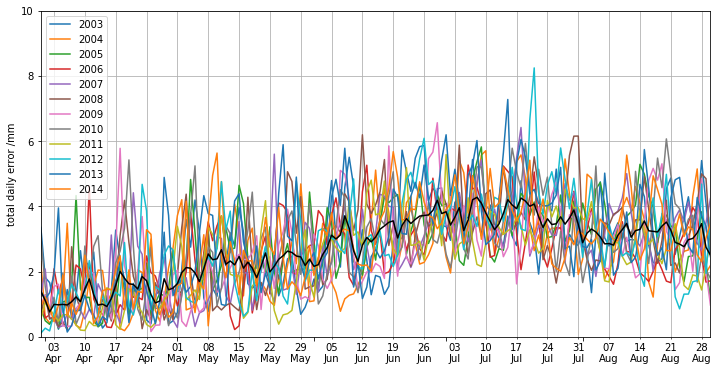

In [27]:
import matplotlib.dates as dates
# pd_plot = pd.concat([df_obs, df_mod,minus], axis=1)
plt.figure(figsize=(6,6))

ymin = 0.
ymax = 10.
# idx = pd.date_range('2003-04-01', '2003-09-01')
# s = pd.Series(np.random.randn(len(idx)), index=idx)

# fig, ax = plt.subplots(6)
# ax.plot_date(idx.to_pydatetime(), 'v-')
ax = df_plot.plot(figsize=(12,6))
ax = df_plot.mean(1).plot(color='k',label="mean")
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0),
                                                interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%b'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
# ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n'))
# ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
# plt.tight_layout()
# plt.show()
ax.set_ylabel("total daily error /mm")
# plt.title(year)
plt.savefig("./output_pic/" + "CN05.1_timseries.png")